#### Image Classification to help a visually impaired person to identify 10 different objects 

All the image used as input(train) have resolation of 200X200

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import keras 
from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten ,MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD



In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3), input_shape=(200,200,3), activation='relu',))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), input_shape=(200,200,3), activation='relu',))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), input_shape=(200,200,3), activation='relu',))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
data_generator = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True, validation_split=0.2)
train_x = data_generator.flow_from_directory(
        '/content/drive/MyDrive/train',
        target_size=(200, 200),
        class_mode='categorical')
test_x = data_generator.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(200,200),
    class_mode='categorical', subset='validation')

Found 1848 images belonging to 10 classes.
Found 365 images belonging to 10 classes.


Training data = 1848,  
Test data = 365

In [ ]:
print(train_x.class_indices)

{'bathtub': 0, 'car': 1, 'coffee-mug': 2, 'dog': 3, 'elephant': 4, 'fire-extinguisher': 5, 'knife': 6, 'motorbikes': 7, 'refrigerator': 8, 'umbrella': 9}


Ten classes are there:
0- bathtub, 1-car , 2-coffee-mug , 3-dog , 4-elephant, 5- fire-extenguisher, 6-knife, 7- motobike, 8- refrigerator, 9 - Umbrella 

In [ ]:
model.fit(train_x, steps_per_epoch=50,epochs=10 , validation_data= test_x)

Epoch 1/10
50/50 [==============================] - 74s 1s/step - loss: 1.5402 - accuracy: 0.4938 - val_loss: 1.1644 - val_accuracy: 0.6027
Epoch 2/10
50/50 [==============================] - 74s 1s/step - loss: 1.0278 - accuracy: 0.6700 - val_loss: 0.8811 - val_accuracy: 0.6959
Epoch 3/10
50/50 [==============================] - 73s 1s/step - loss: 0.8670 - accuracy: 0.7280 - val_loss: 0.6954 - val_accuracy: 0.7808
Epoch 4/10
50/50 [==============================] - 73s 1s/step - loss: 0.7110 - accuracy: 0.7651 - val_loss: 0.5275 - val_accuracy: 0.8438
Epoch 5/10
50/50 [==============================] - 73s 1s/step - loss: 0.6134 - accuracy: 0.8040 - val_loss: 0.3987 - val_accuracy: 0.8877
Epoch 6/10
50/50 [==============================] - 73s 1s/step - loss: 0.4777 - accuracy: 0.8486 - val_loss: 0.3744 - val_accuracy: 0.8877
Epoch 7/10
50/50 [==============================] - 73s 1s/step - loss: 0.3647 - accuracy: 0.8844 - val_loss: 0.2830 - val_accuracy: 0.8932
Epoch 8/10
50/50 [==

Train Accuracy = 0.9322

Validation Accuracy = 0.9342

Validation loss = 0.2091,







##Pridiction of all test data.


In [ ]:
pred= model.predict_classes(test_x)
pred

array([9, 7, 9, 5, 5, 1, 7, 7, 7, 7, 5, 4, 7, 0, 6, 2, 9, 7, 7, 7, 7, 7,
       7, 2, 5, 7, 7, 1, 1, 7, 7, 1, 7, 8, 3, 5, 7, 7, 7, 9, 8, 5, 3, 9,
       7, 8, 8, 3, 6, 7, 2, 6, 7, 0, 7, 7, 7, 7, 0, 7, 7, 7, 8, 8, 7, 0,
       9, 0, 4, 3, 9, 6, 0, 0, 3, 3, 8, 7, 7, 7, 8, 7, 5, 3, 8, 1, 5, 7,
       0, 1, 7, 7, 0, 2, 5, 7, 5, 0, 7, 4, 4, 5, 7, 7, 7, 7, 7, 7, 0, 3,
       5, 5, 8, 7, 7, 1, 0, 7, 7, 5, 3, 5, 8, 4, 0, 7, 7, 3, 1, 2, 8, 6,
       7, 7, 7, 2, 2, 5, 4, 2, 1, 8, 2, 4, 6, 7, 7, 6, 8, 0, 7, 1, 1, 7,
       7, 7, 3, 5, 7, 8, 7, 4, 7, 7, 7, 7, 6, 7, 7, 3, 1, 9, 7, 1, 5, 7,
       7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 4, 6, 5, 7, 1, 6, 4, 9, 7,
       2, 3, 3, 3, 7, 7, 9, 9, 5, 4, 0, 1, 9, 0, 6, 7, 0, 7, 2, 3, 7, 6,
       7, 7, 5, 4, 2, 7, 7, 7, 7, 7, 7, 9, 7, 6, 2, 2, 7, 2, 6, 0, 9, 2,
       6, 7, 9, 1, 7, 3, 0, 5, 7, 0, 2, 0, 0, 7, 0, 3, 4, 7, 7, 0, 9, 5,
       5, 6, 5, 7, 5, 0, 8, 8, 3, 6, 7, 7, 6, 3, 4, 0, 7, 4, 7, 7, 7, 6,
       1, 7, 6, 7, 7, 7, 7, 7, 7, 8, 4, 7, 7, 7, 7,

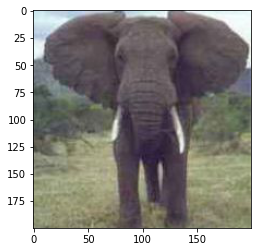

In [ ]:
img = image.load_img('/content/064_0009.jpg', target_size=(200,200,3))
img= image.img_to_array(img)
img= np.expand_dims(img, axis = 0)
img /= 255
img= np.array(img, 'float32')
img = img.reshape([200,200,3]);
plt.imshow(img)
plt.show()


In [ ]:
img1= image.load_img('/content/064_0009.jpg', target_size=(200,200,3))
img= image.img_to_array(img1)
img= np.expand_dims(img, axis = 0)
pred= model.predict_classes(img)
pred


array([4])

In [ ]:
print(train_x.class_indices)

{'bathtub': 0, 'car': 1, 'coffee-mug': 2, 'dog': 3, 'elephant': 4, 'fire-extinguisher': 5, 'knife': 6, 'motorbikes': 7, 'refrigerator': 8, 'umbrella': 9}


As seen, array([4]) image is Elephant, it correctly predict elephant. 

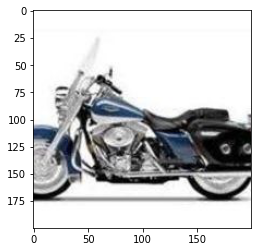

In [ ]:
img = image.load_img('/content/bike1.jpg', target_size=(200,200,3))
img= image.img_to_array(img)
img= np.expand_dims(img, axis = 0)
img /= 255
img= np.array(img, 'float32')
img = img.reshape([200,200,3]);
plt.imshow(img)
plt.show()

In [ ]:
img1= image.load_img('/content/bike1.jpg', target_size=(200,200,3))
img= image.img_to_array(img1)
img= np.expand_dims(img, axis = 0)
pred= model.predict_classes(img)
pred

array([7])

In [ ]:
print(train_x.class_indices)

{'bathtub': 0, 'car': 1, 'coffee-mug': 2, 'dog': 3, 'elephant': 4, 'fire-extinguisher': 5, 'knife': 6, 'motorbikes': 7, 'refrigerator': 8, 'umbrella': 9}


As seen, array([7]) image is motorbikes, it correctly predict motorbikes.